In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [2]:
img1 = cv2.imread('1.jpg',0)
img2 = cv2.imread('2.jpg',0)
img3 = cv2.imread('3.jpg',0)
img4 = cv2.imread('4.jpg',0)

In [3]:
sp_x_r = [159,158,153,154,163,167,171,217,160,213,173,163,185,216,159,162,186,170,
          150,159,186,211,164,218,228,156,179,151,173,145,185,186,181,213,159,208,
          158,191,224,218,178,170,183,171,218,214,218,151,158,225]
sp_y_r = [6,38,16,7,30,129,166,292,32,287,127,159,254,286,156,156,233,461,
          12,45,229,347,47,324,322,16,120,6,457,19,233,232,228,282,18,292,
          20,247,314,344,120,34,233,128,351,287,280,7,9,313]
sp_river = []
for i in range(len(sp_x_r)):
    sp_river.append([sp_x_r[i],sp_y_r[i]])
#print(sp_river)
sp_x_nr = [230,216,489,311,120,137,417,302,89,427,369,88,79,476,70,316,48,394,
           32,448,416,360,287,91,31,293,92,418,68,344,428,55,294,53,380,371,
           486,238,446,131,125,308,312,311,275,359,132,210,457,246,299,360,421,493,
           236,375,392,48,478,254,427,57,445,448,50,404,392,424,451,379,359,269,
           147,412,236,337,232,362,479,475,306,91,462,275,468,102,306,237,338,405,
           264,410,220,106,389,110,247,391,63,433]
sp_y_nr = [83,214,163,85,402,430,307,49,436,425,244,374,227,43,296,70,118,366,
           411,215,113,333,24,235,383,109,402,444,261,420,245,438,149,416,245,66,
           18,55,411,226,271,100,336,208,253,444,387,123,340,108,334,365,375,445,
           158,355,377,233,75,441,103,404,308,313,96,83,49,173,185,406,458,460,
           253,464,98,478,471,327,240,489,239,425,452,65,173,441,478,149,475,90,
           289,198,150,168,147,95,457,93,414,197]

sp_non_river = []
for i in range(len(sp_x_nr)):
    sp_non_river.append([sp_x_nr[i],sp_y_nr[i]])
#print(sp_non_river)


In [4]:
sp_river_p = []
non_sp_river_p = []

for i in range(len(sp_river)):
    sp_river_p.append([img1[sp_river[i][0]][sp_river[i][1]],img2[sp_river[i][0]][sp_river[i][1]],img3[sp_river[i][0]][sp_river[i][1]],img4[sp_river[i][0]][sp_river[i][1]],0])
#print(sp_river_p)
sp_river_p = np.array(sp_river_p)
for i in range(len(sp_non_river)):
    non_sp_river_p.append([img1[sp_non_river[i][0]][sp_non_river[i][1]],img2[sp_non_river[i][0]][sp_non_river[i][1]],img3[sp_non_river[i][0]][sp_non_river[i][1]],img4[sp_non_river[i][0]][sp_non_river[i][1]],1])
#print(non_sp_river_p)
non_sp_river_p = np.array(non_sp_river_p)

#print(sp_river_p)
#print(non_sp_river_p)

In [5]:
river_train,river_test = train_test_split(sp_river_p, test_size = 0.4)
non_river_train, non_river_test = train_test_split(non_sp_river_p, test_size = 0.4)

In [6]:
training_data = np.concatenate((river_train,non_river_train),axis = 0)
testing_data = np.concatenate((river_test,non_river_test),axis = 0)
#print(testing_data)

In [7]:
# Euclidean Distance
def euclidean(p,q):
    dis = 0
    i = 0
    while i <= 3:
        #print(p[i],'-->',q[i])
        dis += ((q[i]-p[i])**2)
        #print(dis)
        i = i + 1
    dis = math.sqrt(dis)
    dis = round(dis,2)
    return [dis,q[4]]

In [8]:
# Apply Euclidean
for i in range(0,len(testing_data)):
    dist = []
    for j in range(0,len(training_data)):
        dist.append(euclidean(testing_data[i],training_data[j]))
#print(dist)

In [9]:
K=[1,3,5,7,9]
accuracy=[]
for k in K:
    valid=0
    for i in range(0,len(testing_data)):
        distance=[]
        for j in range(0,len(training_data)):
            distance.append(euclidean(testing_data[i],training_data[j]))
        distance.sort()
        k_distance=distance[:k]
        #print(len(k_distance))
        total=0;
        
        for a in range(0,len(k_distance)):
            if(k_distance[a][1]==1):
                total+=1
        if(total>(k//2)):
            if(testing_data[i][4]==1):
                valid+=1
        else:
            if(testing_data[i][4]==0):
                valid+=1
    accuracy.append(round(valid/len(testing_data),2))
print("K","   ","Accuracy")
print("--------------")
for i in range(0,len(K)):
    print(K[i],"   ",accuracy[i])


K     Accuracy
--------------
1     0.53
3     0.57
5     0.58
7     0.58
9     0.62


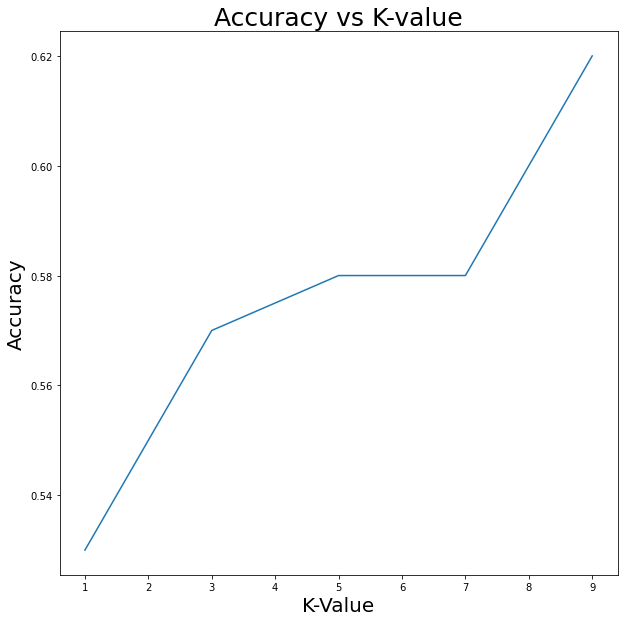

In [10]:
x_axis = [1,3,5,7,9]
y_axis = accuracy

plt.figure(figsize=(10,10))
plt.title("Accuracy vs K-value",fontsize="25")
plt.xlabel("K-Value",fontsize="20")
plt.ylabel("Accuracy",fontsize="20")
plt.plot(x_axis,y_axis)
plt.show()